지도학습은 특성(feature)을 통해 target을 맞추는 것이다. <br>
비지도학습은 target없이 입력 데이터만 사용합니다.이들은 데이터를 잘 파악하거나 변형하는데 도움을 줍니다.

In [26]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [27]:
fish_data = [[l,w]for l,w in zip(fish_length,fish_weight)]
fish_target=[1]*35+[0]*14

In [28]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()

In [29]:
train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]

In [30]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [31]:
kn.score(test_input,test_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.0

In [32]:
import numpy as np

In [33]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [34]:
input_arr.shape
#(49,2)는 arr이 tidy data로 구성되어있다면 (샘플수,특성수)를 의미한다. 

(49, 2)

In [35]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [36]:
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [42]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [40]:
input_arr[13],train_input[0]

(array([ 32., 340.]), array([ 32., 340.]))

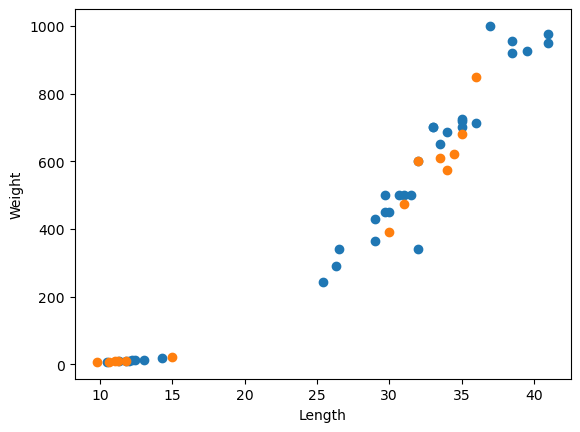

In [45]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1]) #2차원 배열을 인덱싱 하는 것인데 행,열 순서로 인덱싱 된다. 
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

    fit을 실행할때 마다 설정한 model 객체는 이전 학습한 것을 모두 잃어버린다. 이전 모델을 유지하고 싶다면 객체를 새로 만들어 설정을 해야한다. 

In [46]:
kn = kn.fit(train_input,train_target)

In [47]:
kn.score(test_input,test_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [48]:
kn.predict(test_input)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [49]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

---

**전처리**

In [52]:
fish_data = np.column_stack((fish_length,fish_weight))

In [53]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

In [56]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state=42)

In [59]:
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [61]:
kn.predict([[25,150]]) #-> 빙어라고 예측하였다. 

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0.])

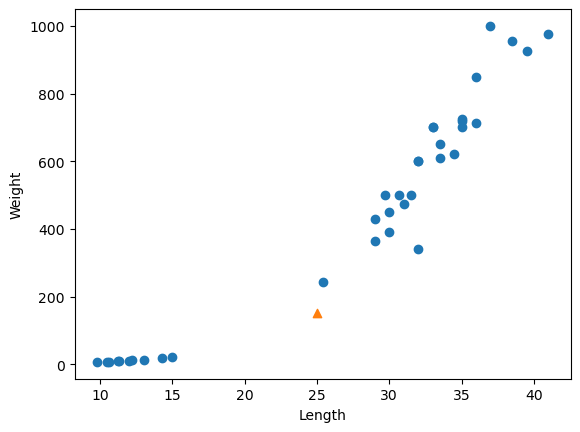

In [62]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [64]:
distances, indexes = kn.kneighbors([[25,150]])

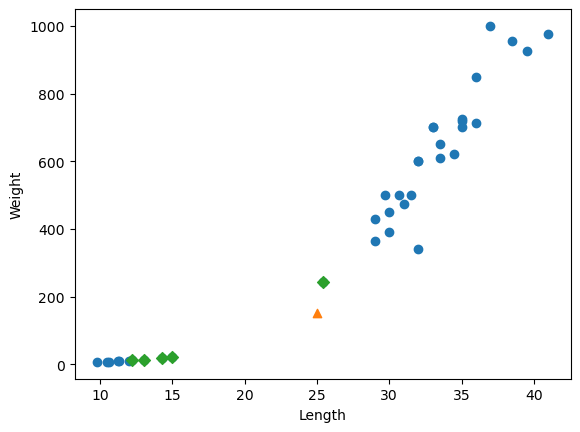

In [65]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [66]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [67]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

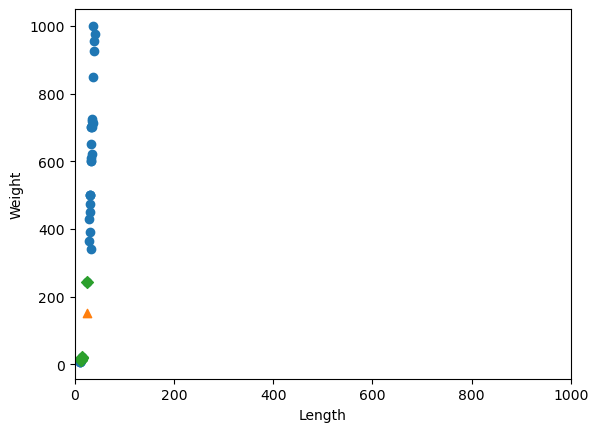

In [69]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^")
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker="D")
plt.xlim(0,1000)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

    데이터 값의 단위가 달라 neighbor가 잘못 잡히면서 발생하는 데이터 오류이다. 따라서 이것을 표준점수로 바꾸는 방법이 있다.
    표준점수로 바꾸는 방법은 평균을 빼고 표준편차로 나누어준다. Z검정 통계량을 구하듯이. 

In [71]:
mean = np.mean(train_input,axis = 0)
std = np.std(train_input,axis=0)# axis0은 accross the row 

In [85]:
train_scaled = (train_input-mean)/std
test_scaled = (test_input-mean)/std


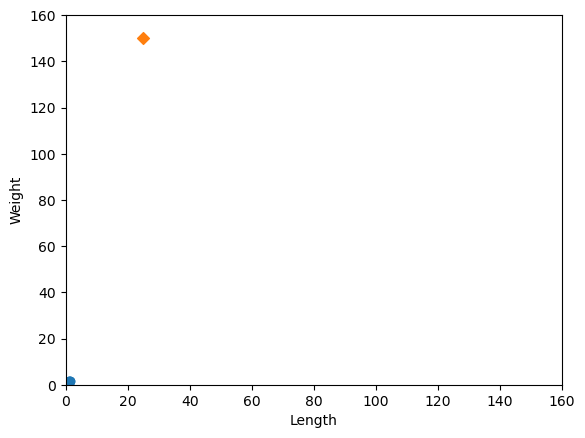

In [77]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker="D")#요놈 혼자 튀네? 왜냐면 표준 점수화 되지 않았기 때문이다. 
plt.xlim(0,160)
plt.ylim(0,160)
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [78]:
new_ext = ([25,150]-mean)/std

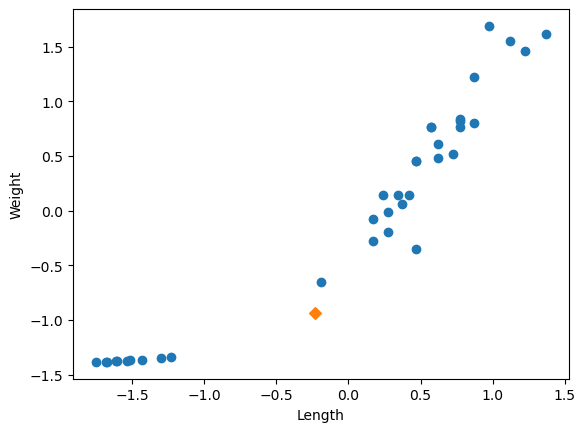

In [84]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new_ext[0],new_ext[1],marker="D") 
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

In [86]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [88]:
kn.score(test_scaled,test_target)

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [90]:
kn.predict([new_ext])

c:\Users\JINU\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1.])

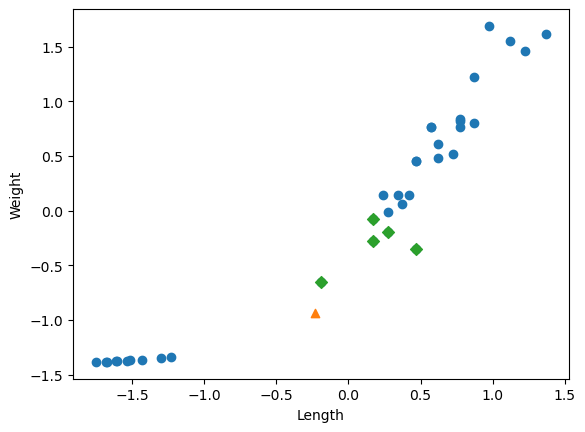

In [93]:
distance, indexes = kn.kneighbors([new_ext])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new_ext[0],new_ext[1],marker="^")
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker="D")
plt.xlabel("Length")
plt.ylabel("Weight")
plt.show()

표준점수를 설정할때에는 train set을 기준으로 mean과 std를 고른후 이를 train set과 test set에 적용해 주어야한다.